# YOUTUBE COMMENTS SENTIMENT ANALYSIS:

# Objective:

The primary objective of this project is to analyse the comments posted by various users in the youtube videos.

# The flow of the project is as below:
    *Reading the data in python
    *Cleaning the data and transforming it to be useful for basic analysis 
    *Basic Data exploration
    *Performing sentiment analysis

# Steps:
    1. Importing Necessary Libraries
    2. Basic Data Exploration
        2.1 Dimensionality of the dataset
        2.2 Top 5 and last 5 records of Data
        2.3 Unique Values of data
        2.4 Information of the dataset
        2.5 Missing values
        2.6 Duplicate values
    3. Data Cleansing
        3.1 Removing null values
        3.2 Removing duplicated values
        3.3 Converting text to lower
        3.4 Removing Stopwords
        3.5 Removing Numbers
        3.6 Lemmetisation
    4. Data Exploartion after cleaning the data
        4.1 Top 10 frequently occuring words
        4.2 Wordcloud of the dataset
    5. Performing Sentiment Analysis
        5.1 Implementing Vader sentiment analyzer
        5.2 Calculating sentiment scores
        5.3 Classifying the comments into positive, negative and neutral based on the sentiment score.
    6. Visualisation after Sentiment analysis
        6.1 Bar plot
        6.2 Pie chart
        6.3 Wordcloud for Positive comments
        6.4 Wordcloud for Negative comments
        6.5 Wordcloud for Neutral comments


# 1. Importing Necessary Libraries

In [76]:
import pandas as pd
import numpy as np
import seaborn as sns
from matplotlib import pyplot as plt
from nltk.corpus import wordnet
from nltk.stem import WordNetLemmatizer
import nltk
from nltk.corpus import stopwords 
import string

from wordcloud import WordCloud,STOPWORDS


import warnings
warnings.filterwarnings('ignore')

# 2. Basic Data Exploration

In [77]:
comments_data=pd.read_csv("UScomments.csv",error_bad_lines=False)

b'Skipping line 41589: expected 4 fields, saw 11\nSkipping line 51628: expected 4 fields, saw 7\nSkipping line 114465: expected 4 fields, saw 5\n'
b'Skipping line 142496: expected 4 fields, saw 8\nSkipping line 189732: expected 4 fields, saw 6\nSkipping line 245218: expected 4 fields, saw 7\n'
b'Skipping line 388430: expected 4 fields, saw 5\n'


## 2.1 Dimensionality of the dataset


In [78]:
#Retrieving the dimensionality of the data frame
rows=comments_data.shape[0]
columns=comments_data.shape[1]
print(f"There are {rows} rows and {columns} columns in the given dataset")

There are 691400 rows and 4 columns in the given dataset


## 2.2 Top 10 and last 10 records of Data

In [79]:
#To get the top 5 records of the dataset
comments_data.head(5)

,video_id,comment_text,likes,replies
0,XpVt6Z1Gjjo,Logan Paul it's yo big day ‼️‼️‼️,4,0
1,XpVt6Z1Gjjo,I've been following you from the start of your...,3,0
2,XpVt6Z1Gjjo,Say hi to Kong and maverick for me,3,0
3,XpVt6Z1Gjjo,MY FAN . attendance,3,0
4,XpVt6Z1Gjjo,trending 😉,3,0


In [80]:
#To get the bottom 5 records of the dataset
comments_data.tail(5)

,video_id,comment_text,likes,replies
691395,EoejGgUNmVU,Лучшая,1,0
691396,EoejGgUNmVU,qu'est ce que j'aimerais que tu viennes à Roan...,0,0
691397,EoejGgUNmVU,Ven a mexico! 😍 te amo LP,0,0
691398,EoejGgUNmVU,Islığı yeter...,0,0
691399,EoejGgUNmVU,Kocham tą piosenkę😍❤❤❤byłam zakochana po uszy ...,0,0


In [81]:
#To get the random 5 records of the dataset
comments_data.sample(5)

,video_id,comment_text,likes,replies
579181,wUHWzsF_qJM,<3,0,0
58069,hMfIIxf8ADo,gorgeous look !! beautiful collection :33,0,0
421338,658YZO_CmOk,"Idubbbz 13 million views in two days. But, thi...",2,0
44347,LolP3Y7_Irs,How is my lovely Nile doing love you lots ...,0,0
333791,h3M-3SrmDok,I really thought The Shield was back together...,0,0


## 2.3 Unique values of data

In [82]:
#To get the count of unique values of each column present in the dataset. 
comments_data.nunique()

video_id          2266
comment_text    434076
likes             1284
replies            479
dtype: int64

## 2.4 Info of the dataset

In [83]:
#To get and print the column header and the data type stored in each column.
comments_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 691400 entries, 0 to 691399
Data columns (total 4 columns):
 #   Column        Non-Null Count   Dtype 
---  ------        --------------   ----- 
 0   video_id      691400 non-null  object
 1   comment_text  691375 non-null  object
 2   likes         691400 non-null  object
 3   replies       691400 non-null  object
dtypes: object(4)
memory usage: 21.1+ MB


## 2.5 Missing values

In [84]:
comments_data.isnull().sum()

video_id         0
comment_text    25
likes            0
replies          0
dtype: int64

## 2.6 Duplicate values

In [85]:
#To check for the presence of duplicated entries in the dataset
print(comments_data.duplicated().sum())

212693


# 3. Data Cleansing

## 3.1 Removing null values

In [86]:
# To Drop the null values
comments_data=comments_data.dropna()

In [87]:
comments_data.isnull().sum()

video_id        0
comment_text    0
likes           0
replies         0
dtype: int64

## 3.2 Removing duplicate values

In [88]:
#To drop the duplicated values
comments_data=comments_data.drop_duplicates()

In [89]:
print(comments_data.duplicated().sum())

0


## 3.3 Converting text to lower

In [90]:
comments_data["comment_text"] = comments_data["comment_text"].str.lower()
comments_data.head()

,video_id,comment_text,likes,replies
0,XpVt6Z1Gjjo,logan paul it's yo big day ‼️‼️‼️,4,0
1,XpVt6Z1Gjjo,i've been following you from the start of your...,3,0
2,XpVt6Z1Gjjo,say hi to kong and maverick for me,3,0
3,XpVt6Z1Gjjo,my fan . attendance,3,0
4,XpVt6Z1Gjjo,trending 😉,3,0


## 3.4 Removing Stopwords

In [91]:
#To remove stop words
stopwords = set(stopwords.words('english'))
def remove_stopwords(text):
    #Join all the words into one string if the words are not part of the defines stopwords.
    return " ".join([word for word in str(text).split() if word not in stopwords])
# applying Anonymous functions to remove stopwords for each and every row 
comments_data["comment_text"] = comments_data["comment_text"].apply(lambda text: remove_stopwords(text))
comments_data.head()

,video_id,comment_text,likes,replies
0,XpVt6Z1Gjjo,logan paul yo big day ‼️‼️‼️,4,0
1,XpVt6Z1Gjjo,i've following start vine channel seen 365 vlogs,3,0
2,XpVt6Z1Gjjo,say hi kong maverick,3,0
3,XpVt6Z1Gjjo,fan . attendance,3,0
4,XpVt6Z1Gjjo,trending 😉,3,0


## 3.5 Removing Numbers

In [92]:
#To Remove Numbers
def remove_num(text):
    #Join the words into a string if they are not a digit.
    return ''.join(filter(lambda x: not x.isdigit(), text))
# applying Anonymous functions to remove numbers for each and every row 
comments_data["comment_text"]  = comments_data["comment_text"] .apply(lambda text: remove_num(text)) 
comments_data.head()

,video_id,comment_text,likes,replies
0,XpVt6Z1Gjjo,logan paul yo big day ‼️‼️‼️,4,0
1,XpVt6Z1Gjjo,i've following start vine channel seen vlogs,3,0
2,XpVt6Z1Gjjo,say hi kong maverick,3,0
3,XpVt6Z1Gjjo,fan . attendance,3,0
4,XpVt6Z1Gjjo,trending 😉,3,0


## 3.6 Lemmetisation

In [93]:
"""Lemmatization - to convert a word to its base form.
    By lemmetisation, the different inflected forms of the word are considerd to be of a single form
    example - run, running, ran are considered as run"""

lemmatizer = WordNetLemmatizer()
#Set is created where parts of speech tag is the key  whose values are mapped with the value from wordnet dictionary. 
wordnet_map = {"N":wordnet.NOUN, "V":wordnet.VERB, "J":wordnet.ADJ, "R":wordnet.ADV}
def lemmatize_words(text):
    #assigning some specific token (Parts of Speech) to each word.
    pos_tagged_text = nltk.pos_tag(text.split())
    #returning string after lemmetising
    return " ".join([lemmatizer.lemmatize(word, wordnet_map.get(pos[0], wordnet.NOUN)) for word, pos in pos_tagged_text])
# applying Anonymous functions to lemmetise for each and every row 
comments_data["comment_text"] = comments_data["comment_text"] .apply(lambda text: lemmatize_words(text))
comments_data.head()

,video_id,comment_text,likes,replies
0,XpVt6Z1Gjjo,logan paul yo big day ‼️‼️‼️,4,0
1,XpVt6Z1Gjjo,i've follow start vine channel see vlogs,3,0
2,XpVt6Z1Gjjo,say hi kong maverick,3,0
3,XpVt6Z1Gjjo,fan . attendance,3,0
4,XpVt6Z1Gjjo,trend 😉,3,0


# 4. Data Exploartion after cleaning the data

## 4.1 Top 10 frequently occuring words

In [94]:
#split the sentence into list and then count each of its occurance.
frequency_of_words = pd.Series(' '.join(comments_data["comment_text"]).split()).value_counts()[:10]
frequency_of_words

like     47177
love     44193
get      34956
make     30866
look     23965
video    23574
go       22951
one      21726
i'm      20755
see      18977
dtype: int64

## 4.2 Wordcloud of the dataset

In [95]:
text = " ".join(review for review in comments_data.comment_text)
print ("There are {} words in the combination of all review.".format(len(text)))

There are 27100115 words in the combination of all review.


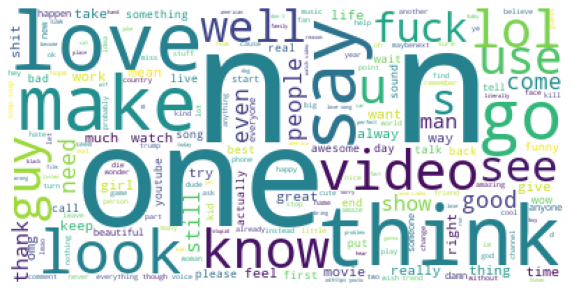

In [96]:
# Generate a word cloud image
wordcloud = WordCloud( background_color="white").generate(text)

# Displaying the image
plt.figure(figsize=(10, 10))
plt.imshow(wordcloud)
plt.axis("off")
plt.show()

# 5. Performing Sentiment Analysis

## 5.1 Implementing Vader sentiment analyzer

Note : Since the dataset have punctuations and emojis, we preferred Vader (Valence aware dictionary for sentiment reasoning) over TextBlob since vader leverages certian rules known as heuristics (punctuations, degree adverbs etc ) to calculate the sentiment score. 

For Instance, According to Vader, "The weather is cold !!!!!" is more intense than "The weather is cold"


In [97]:
import nltk
nltk.download('vader_lexicon')

[nltk_data] Downloading package vader_lexicon to
[nltk_data]     C:\Users\Admin\AppData\Roaming\nltk_data...
[nltk_data]   Package vader_lexicon is already up-to-date!


True

In [98]:
from nltk.sentiment.vader import SentimentIntensityAnalyzer
sentiment_analyser = SentimentIntensityAnalyzer()

## 5.2 Calculating sentiment scores

In [99]:
#Creating a cloumn named Sentiment Score to store the polarity score of each comment.
#Retrieving and calculating the polarity score for each and every comment from the comment_text column
comments_data['Sentiment_Score'] = comments_data['comment_text'].apply(lambda comment_text: sentiment_analyser.polarity_scores(comment_text))
comments_data.head()

,video_id,comment_text,likes,replies,Sentiment_Score
0,XpVt6Z1Gjjo,logan paul yo big day ‼️‼️‼️,4,0,"{'neg': 0.0, 'neu': 1.0, 'pos': 0.0, 'compound..."
1,XpVt6Z1Gjjo,i've follow start vine channel see vlogs,3,0,"{'neg': 0.0, 'neu': 1.0, 'pos': 0.0, 'compound..."
2,XpVt6Z1Gjjo,say hi kong maverick,3,0,"{'neg': 0.0, 'neu': 1.0, 'pos': 0.0, 'compound..."
3,XpVt6Z1Gjjo,fan . attendance,3,0,"{'neg': 0.0, 'neu': 0.303, 'pos': 0.697, 'comp..."
4,XpVt6Z1Gjjo,trend 😉,3,0,"{'neg': 0.0, 'neu': 1.0, 'pos': 0.0, 'compound..."


In [100]:
#Creating a cloumn named Compound Sentiment Score to store the overall score of each comment.
#Retrieving and calculating the overall score for each and every Sentiment score from the Compound Sentiment Score column
comments_data['Compound_Sentiment_Score'] = comments_data['Sentiment_Score'].apply(lambda score_dict: score_dict['compound'])


## 5.3 Classifying the comments into positive, negative and neutral based on the sentiment score.

In [101]:
#If compound score is >0 then the comment is positive, else if compund score is <0 then the comment is negative, else it ia a neutral comment
comments_data['Sentiment_Type']=''
comments_data.loc[comments_data.Compound_Sentiment_Score>0,'Sentiment_Type']='Positive'
comments_data.loc[comments_data.Compound_Sentiment_Score==0,'Sentiment_Type']='Neutral'
comments_data.loc[comments_data.Compound_Sentiment_Score<0,'Sentiment_Type']='Negative'

In [102]:
comments_data.head()

,video_id,comment_text,likes,replies,Sentiment_Score,Compound_Sentiment_Score,Sentiment_Type
0,XpVt6Z1Gjjo,logan paul yo big day ‼️‼️‼️,4,0,"{'neg': 0.0, 'neu': 1.0, 'pos': 0.0, 'compound...",0.0000,Neutral
1,XpVt6Z1Gjjo,i've follow start vine channel see vlogs,3,0,"{'neg': 0.0, 'neu': 1.0, 'pos': 0.0, 'compound...",0.0000,Neutral
2,XpVt6Z1Gjjo,say hi kong maverick,3,0,"{'neg': 0.0, 'neu': 1.0, 'pos': 0.0, 'compound...",0.0000,Neutral
3,XpVt6Z1Gjjo,fan . attendance,3,0,"{'neg': 0.0, 'neu': 0.303, 'pos': 0.697, 'comp...",0.3182,Positive
4,XpVt6Z1Gjjo,trend 😉,3,0,"{'neg': 0.0, 'neu': 1.0, 'pos': 0.0, 'compound...",0.0000,Neutral


# 6. Visualisation after Sentiment analysis

## 6.1 Bar plot 

<AxesSubplot:title={'center':'sentiment analysis'}>

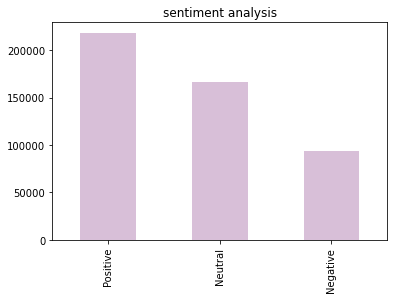

In [103]:
comments_data.Sentiment_Type.value_counts().plot(kind='bar',title="sentiment analysis",color='thistle')

## 6.2 Pie chart

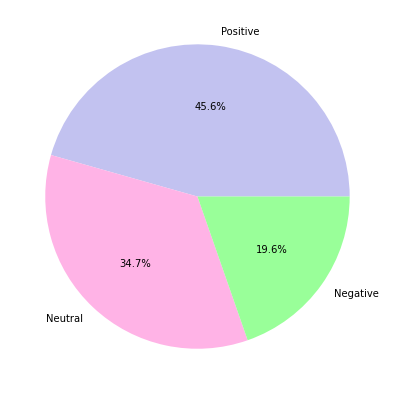

In [105]:
plt.figure(figsize=(10,7))
colors = ['#c2c2f0','#ffb3e6','#99ff99', '#66b3ff' ]
plt.pie(x=comments_data['Sentiment_Type'].value_counts().values,colors=colors,
        labels=comments_data['Sentiment_Type'].value_counts().index,
        autopct='%2.1f%%')

plt.show()

## 6.3 Wordcloud for Positive comments

In [106]:
#Wordcloud - To visualise most frequent terms among all positive comments
positive_sentiment = comments_data[comments_data['Sentiment_Type']=='Positive']
text = positive_sentiment.comment_text.values

In [107]:
wordcloud_for_positive_sentiment=WordCloud(background_color='white',collocations=False).generate(" ".join(text))

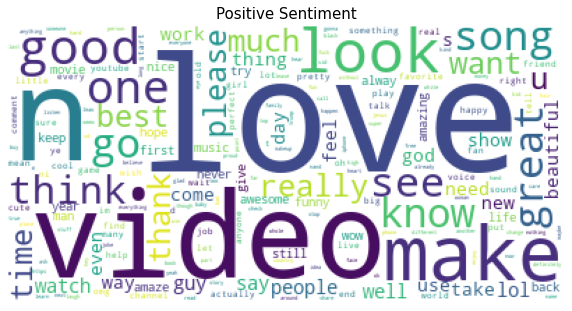

In [108]:
plt.figure(figsize=(10, 10))
plt.axis('off')
plt.title("Positive Sentiment",fontsize=15)
plt.imshow(wordcloud_for_positive_sentiment)

## 6.4 Wordcloud for Negative comments

In [109]:
#Wordcloud - To visualise most frequent terms among all negative comments
negative_sentiment = comments_data[comments_data['Sentiment_Type']=='Negative']
text = negative_sentiment.comment_text.values

In [110]:
wordcloud_for_negative_sentiment=WordCloud(background_color='white',collocations=False).generate(" ".join(text))

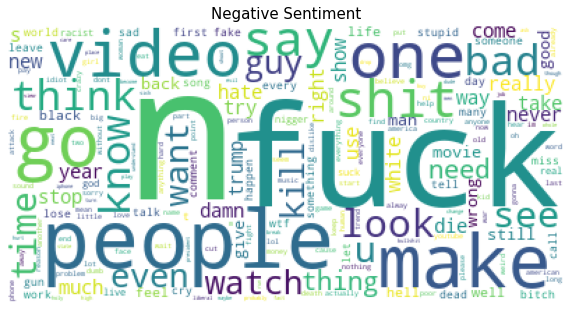

In [111]:
plt.figure(figsize=(10, 10))
plt.axis('off')
plt.title("Negative Sentiment",fontsize=15)
plt.imshow(wordcloud_for_negative_sentiment)

## 6.5 Wordcloud for Neutral comments

In [112]:
#Wordcloud - To visualise most frequent terms among all neutral comments
neutral_sentiment = comments_data[comments_data['Sentiment_Type']=='Neutral']
text = neutral_sentiment.comment_text.values

In [113]:
wordcloud_for_neutral_sentiment=WordCloud(background_color='white',collocations=False).generate(" ".join(text))

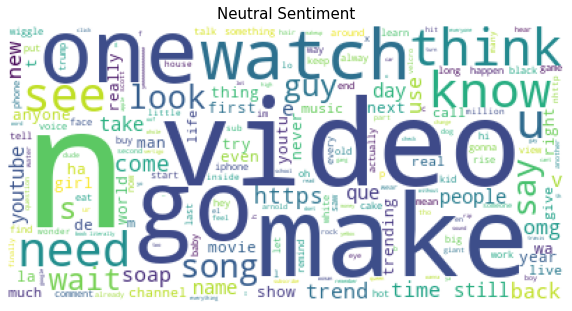

In [114]:
plt.figure(figsize=(10, 10))
plt.axis('off')
plt.title("Neutral Sentiment",fontsize=15)
plt.imshow(wordcloud_for_neutral_sentiment)